In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

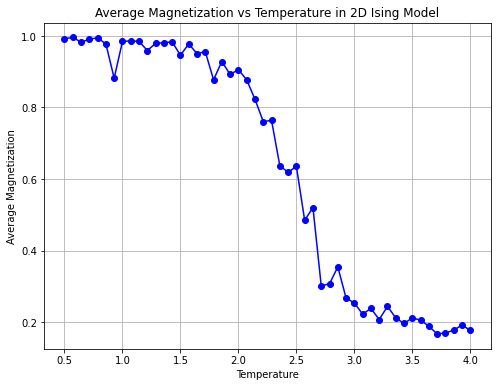

CSV file saved: ising_model_configuration_monte.csv


In [4]:
# Data simulation on 2D square Ising model
def initial_configuration(size): # Function for initial configurations
    return np.random.choice([-1, 1], size=(size, size))
def metropolis_step(config, beta): # Function for metropolis algorithm
    size = config.shape[0]
    i = np.random.randint(size)
    j = np.random.randint(size)
    dE = 2 * config[i, j] * (
        config[(i + 1) % size, j] +
        config[i - 1, j] +
        config[i, (j + 1) % size] +
        config[i, j - 1]
    )
    if dE < 0 or np.random.rand() < np.exp(-beta * dE):
        config[i, j] *= -1
def calculate_magnetization(config): # Function to compute magentisation
    return abs(np.sum(config))
def monte_carlo_simulation(size, num_steps, temperature): #Function for simulation
    config = initial_configuration(size)
    beta = 1.0 / temperature
    magnetization_data = []
    for _ in range(num_steps):
        metropolis_step(config, beta)
        magnetization = calculate_magnetization(config)
        magnetization_data.append(magnetization)    
    return magnetization_data
# Parameters
size = 10
num_steps = 49000
temperatures = np.linspace(0.5, 4.0, 50)
all_configurations = []
average_magnetizations_per_spin = []
for temperature in temperatures:
    magnetization_data = monte_carlo_simulation(size, num_steps, temperature)
    average_magnetization_per_spin = np.mean(magnetization_data) / (size ** 2)  # Dividing by total number of spins
    average_magnetizations_per_spin.append(average_magnetization_per_spin)
    config = initial_configuration(size)  # Get the lattice configuration
    config_data = [(temperature,np.copy(config))]  # Create a list to store configurations
    all_configurations.append(config_data)
    for step in range(num_steps):
        metropolis_step(config, 1.0 / temperature)
        if step % 100 == 0:
            config_data.append((temperature,np.copy(config))) 
# Create line graph
plt.figure(figsize=(8, 6))
plt.plot(temperatures, average_magnetizations_per_spin, marker='o', linestyle='-', color='blue')
plt.xlabel('Temperature')
plt.ylabel('Average Magnetization')
plt.title('Average Magnetization vs Temperature in 2D Ising Model')
plt.grid(True)
plt.show()
# Save the all_configurations array to a CSV file
csv_filename = "ising_model_configuration_monte.csv"
threshold = 0.5
with open(csv_filename, "w") as csv_file:
    for config_data in all_configurations:
        temperature = config_data[0][0]
        for temperature, config in config_data:
            flattened_config = config.flatten()
            magnetization = abs(np.sum(config)) / config.size  # Calculate and take absolute value of magnetization per spin
            label = "ferromagnetic" if magnetization >= threshold else "paramagnetic"
            csv_file.write(f"{temperature},{','.join(map(str, flattened_config))},{label}\n")
print("CSV file saved:", csv_filename)

In [5]:
# Load the labeled data with specified column names
data_df = pd.read_csv("ising_model_configuration_monte.csv", header=None)
temperature_data = data_df.iloc[:, 0]
label_data = data_df.iloc[:, -1]
remaining_columns = data_df.iloc[:, 1:-1]  # Exclude the first and last columns
flattened_configuration = remaining_columns.apply(lambda row: ', '.join(row.astype(str)), axis=1)
# Create the DataFrame with specified column names
data = pd.DataFrame({'Temperature': temperature_data, 'Configuration': flattened_configuration, 'Label': label_data})

In [6]:
print(data)

       Temperature                                      Configuration  \
0              0.5  -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1,...   
1              0.5  -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1,...   
2              0.5  -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -...   
3              0.5  -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, ...   
4              0.5  -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, ...   
...            ...                                                ...   
24545          4.0  1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1,...   
24546          4.0  -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, ...   
24547          4.0  1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1,...   
24548          4.0  -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1,...   
24549          4.0  -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1...   

              Label  
0      paramagnetic  
1      paramagnetic  
2      paramagnetic  
3      paramagnetic  
4      parama

In [7]:
# Define the temperature ranges
temperature_ranges = [(0.5, 1.5), (3.0, 4.0)]
prediction_temp_range = np.linspace(0.5, 4.0, 50)

In [8]:
# Select rows within the specified temperature ranges
selected_data = data[data['Temperature'].between(temperature_ranges[0][0], temperature_ranges[0][1]) |
                     data['Temperature'].between(temperature_ranges[1][0], temperature_ranges[1][1])]
# Extract features (configurations) and labels
X_train = selected_data['Configuration'].apply(lambda x: list(map(int, x.split(',')))).tolist()
y_train = selected_data['Label']
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Creation of Testing dataset
# Initialize variables to track the phase transition
all_configurations_test = []
# Simulate the Ising model and predict at different temperatures
for temperature in prediction_temp_range:
    # Perform Monte Carlo simulation to obtain a configuration
    num_steps = 49000  # You can adjust the number of steps as needed
    config_2 = initial_configuration(size)  # Get the lattice configuration
    config_data_2 = [(temperature,np.copy(config_2))]  # Create a list to store configurations
    all_configurations_test.append(config_data_2)    
    for step in range(num_steps):
        metropolis_step(config_2, 1.0 / temperature)     
        config_data_2.append((temperature,np.copy(config_2))) 

In [ ]:
# to print all the testing data
# print(all_configurations_test)

In [10]:
# Initialise variables
configurations_to_predict_combo = []
configurations_to_predict = []
threshold_mag = 0.5
true_labels = []
# Looping through the testing data
for config_data_2 in all_configurations_test:
        temperature = config_data_2[0][0]
        for temperature, config_2 in config_data_2:
            flattened_config_2 = config_2.flatten() 
            magnetization_test = abs(np.sum(config_2)) / config_2.size  # Calculate and take absolute value of magnetization per spin
            labels = 'ferromagnetic' if magnetization_test >= threshold_mag else 'paramagnetic'
            true_labels.append(labels)
            temperature_and_config = (temperature, flattened_config_2)
            configurations_to_predict.append(flattened_config_2)    # Storing the configurations for prediction
            configurations_to_predict_combo.append(temperature_and_config)  # Storing the temperature with the configuration

In [11]:
print("Size of Data to be predicted: ",len(configurations_to_predict))
print("Size of Data to be predicted combined with Temperature: ", len(configurations_to_predict_combo))

Size of Data to be predicted:  2450050
Size of Data to be predicted combined with Temperature:  2450050


In [12]:
# Predict labels using your classifier
predicted_labels = clf.predict(configurations_to_predict)
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)
# Create a classification report
class_report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", class_report)

Accuracy: 0.9044611334462562
Confusion Matrix:
 [[1297319  167209]
 [  66866  918656]]
Classification Report:
                precision    recall  f1-score   support

ferromagnetic       0.95      0.89      0.92   1464528
 paramagnetic       0.85      0.93      0.89    985522

     accuracy                           0.90   2450050
    macro avg       0.90      0.91      0.90   2450050
 weighted avg       0.91      0.90      0.91   2450050



In [13]:
# Using the classifier model for prediction using function predict_proba
predictions_probs = []
predictions_probs = clf.predict_proba(configurations_to_predict) # Gives the one hot vector of being ferromagnetic in nature i.e: most probable class

In [14]:
print(predictions_probs)
print(len(predictions_probs))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
2450050


In [15]:
# Matching the predictions with the temperatures
matched_data = []
for temperature, prediction_prob in zip([item[0] for item in configurations_to_predict_combo], predictions_probs):
    matched_data.append((temperature, prediction_prob))

    

In [16]:
print(len(matched_data))

2450050


In [17]:
# Gathering the counts of ferromagnetic nature for each temperature
ferromagnetic_counts = {}  # Initialize a dictionary to store counts
# Iterate through matched data and count "ferromagnetic" predictions
for temperature, prediction_prob in matched_data:
    # Check if the prediction is "ferromagnetic" (considering "ferromagnetic" is the positive class)
    is_ferromagnetic = prediction_prob.argmax()  # Get the index of the maximum probability
    if is_ferromagnetic == 0:
        # If the prediction is "ferromagnetic," increment the count for the corresponding temperature
        if temperature not in ferromagnetic_counts:
            ferromagnetic_counts[temperature] = 0
        ferromagnetic_counts[temperature] += 1
print(ferromagnetic_counts)


{0.5: 48582, 0.5714285714285714: 48152, 0.6428571428571428: 48447, 0.7142857142857143: 47798, 0.7857142857142857: 48605, 0.8571428571428571: 48472, 0.9285714285714286: 48297, 1.0: 48426, 1.0714285714285714: 48204, 1.1428571428571428: 48457, 1.2142857142857142: 46109, 1.2857142857142856: 48247, 1.3571428571428572: 44268, 1.4285714285714284: 46809, 1.5: 43797, 1.5714285714285714: 46966, 1.6428571428571428: 47149, 1.7142857142857142: 48167, 1.7857142857142856: 41571, 1.857142857142857: 46843, 1.9285714285714284: 45823, 2.0: 42323, 2.071428571428571: 41444, 2.142857142857143: 35050, 2.2142857142857144: 31182, 2.2857142857142856: 33321, 2.3571428571428568: 30903, 2.4285714285714284: 27076, 2.5: 15951, 2.571428571428571: 12305, 2.642857142857143: 9337, 2.714285714285714: 13682, 2.7857142857142856: 7524, 2.857142857142857: 9361, 2.9285714285714284: 6080, 3.0: 5936, 3.071428571428571: 4622, 3.142857142857143: 5262, 3.214285714285714: 4595, 3.2857142857142856: 4790, 3.3571428571428568: 3844, 3.

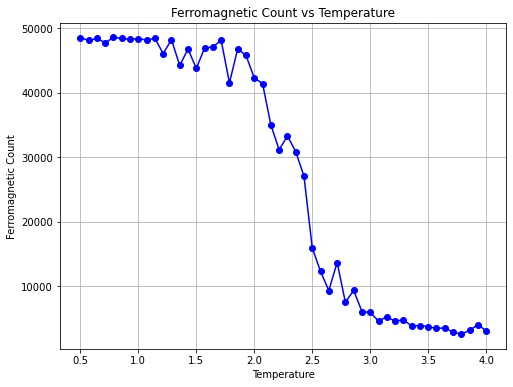

In [18]:
# Plotting a graph for temperature againts the number of ferromagnetic counts
# Extract temperatures and corresponding ferromagnetic counts from the dictionary
temperatures_in_count = list(ferromagnetic_counts.keys())
ferromagnetic_counts_values = list(ferromagnetic_counts.values())
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(temperatures_in_count, ferromagnetic_counts_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Temperature')
plt.ylabel('Ferromagnetic Count')
plt.title('Ferromagnetic Count vs Temperature')
plt.grid(True)
plt.show()


The differences in ferromagnetic counts at adjacent temperature point 
 [  -430    295   -649    807   -133   -175    129   -222    253  -2348
   2138  -3979   2541  -3012   3169    183   1018  -6596   5272  -1020
  -3500   -879  -6394  -3868   2139  -2418  -3827 -11125  -3646  -2968
   4345  -6158   1837  -3281   -144  -1314    640   -667    195   -946
     61   -156   -284     64   -664   -265    549    906   -964] 

Intervals based on temperature which has declining nature in ferromagnetic_counts 
 [0.5, 0.5714285714285714, 0.6428571428571428, 0.7142857142857143, 0.7857142857142857]
Intervals based on temperature which has declining nature in ferromagnetic_counts 
 [0.6428571428571428, 0.7142857142857143, 0.7857142857142857, 0.8571428571428571, 0.9285714285714286]
Intervals based on temperature which has declining nature in ferromagnetic_counts 
 [0.7142857142857143, 0.7857142857142857, 0.8571428571428571, 0.9285714285714286, 1.0]
Intervals based on temperature which has declining n

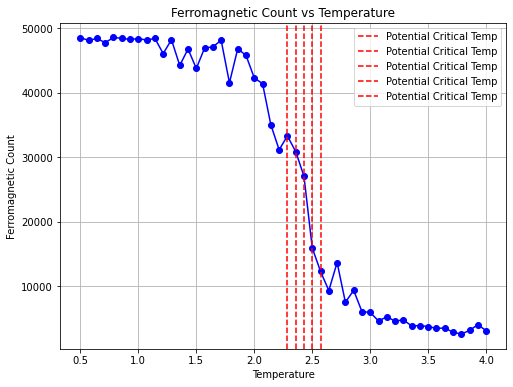

In [43]:
import math
# Calculate differences in ferromagnetic counts between adjacent temperatures
ferromagnetic_count_diffs = []
ferromagnetic_count_diffs = np.diff(ferromagnetic_counts_values)
print("The differences in ferromagnetic counts at adjacent temperature point \n",ferromagnetic_count_diffs,"\n")
# Define the threshold for identifying declines 
threshold = 1  # Adjust as needed
# Define the minimum difference criterion (e.g., 3)
min_difference_criterion = 2  # Adjust as needed
# Initialize variables to track potential critical temperatures
differences_in_intervals = []
temperature_intervals_with_differences = []
# Initialize variables to track the interval with the maximum sum of differences
max_sum_interval = None
max_sum_value = 0
# Iterate through differences in ferromagnetic counts
for i in range(1, len(ferromagnetic_count_diffs)):
    if ferromagnetic_count_diffs[i] < threshold:
        # Identify an interval with decreasing counts
        start_index = max(0, i - 2)  # Consider 2 previous temperatures # Adjust as needed
        end_index = min(i + 3, len(ferromagnetic_count_diffs))  # Ensure end_index does not exceed array size # Adjust as needed
        temperature_interval = temperatures_in_count[start_index:end_index]
        print("Intervals based on temperature which has declining nature in ferromagnetic_counts \n",temperature_interval)
        # Check if the counts are consistently decreasing in the interval
        if all(ferromagnetic_count_diffs[j] < threshold for j in range(start_index, end_index)):
            interval_differences = ferromagnetic_count_diffs[start_index:end_index]
            print("The differences in interval at which the declining nature is consistent in nearby temperature points \n", interval_differences,"\n")
    # Calculating the sum of differences for each interval in the threshold
            min_difference = abs(sum(interval_differences))
        # Check if this interval has the maximum sum of differences
            if min_difference > max_sum_value:
                max_sum_value = min_difference
                max_sum_interval = interval_differences
        # Check if the minimum difference within the interval meets the criterion
            if min_difference >= min_difference_criterion:
                # Store the differences in the intervals
                differences_in_intervals.append(interval_differences)
                # Store the temperature interval along with differences in the list
                temperature_intervals_with_differences.append((temperature_interval, interval_differences))
print(differences_in_intervals)
print("\n The interval at which the declining nature is consistent in nearby temperature points along with the differences \n",temperature_intervals_with_differences,"\n")
# Finding the index of intervals at which the maximum difference is seen               
max_sum_interval_index = None
max_sum_temperature_interval = None
for idx, interval in enumerate(differences_in_intervals):
    if (interval == max_sum_interval).all():
        max_sum_interval_index = idx
        break
# print(max_sum_interval_index)
if max_sum_interval_index is not None:
    max_sum_temperature_interval, _ = temperature_intervals_with_differences[max_sum_interval_index]
# Output potential critical temperatures
max_sum_temperature_interval = list(map(lambda x: round(x, 4), max_sum_temperature_interval))
print("Potential Critical Temperatures:", max_sum_temperature_interval)
length= len(max_sum_temperature_interval)
center_index = (length - 1) // 2  
center_value = max_sum_temperature_interval[center_index]
print("Critical temperature estimate:", center_value)
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(temperatures_in_count, ferromagnetic_counts_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Temperature')
plt.ylabel('Ferromagnetic Count')
plt.title('Ferromagnetic Count vs Temperature')
plt.grid(True)
# Plot vertical lines or markers for potential critical temperatures
for temp in max_sum_temperature_interval:
    plt.axvline(x=temp, color='red', linestyle='--', label='Potential Critical Temp')
# Show the legend
plt.legend()
# Display the plot
plt.show()


In [37]:
import joblib
# Save the trained classifier to a file
joblib.dump(clf, 'trained_classifier.pkl')

['trained_classifier.pkl']